# Milestone 1 Phase 2

The milestones were created to evaluate learning in the Hacktiv8 Data Science Full Time Program Phase 2, especially on Artificial Neural Networks.

The milestone written by Risqi Rahmatullah, Batch 007.

## Description

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn  
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies  
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges  
- Demographic info about customers – gender, age range, and if they have partners and dependents  

Source: https://www.kaggle.com/blastchar/telco-customer-churn

## Assignment Objectives

*Milestones 1* ini dibuat guna mengevaluasi Pembelajaran Phase 2 :

- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu menganalisis dan menjelaskan layer yang dibuat.

## Libraries

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Normalization, StringLookup, IntegerLookup, CategoryEncoding
from tensorflow.keras.layers import concatenate, Dense, Activation, Input, Dropout
from tensorflow.keras.optimizers import Adam

## Data Loading

In [61]:
telco = pd.read_csv("https://raw.githubusercontent.com/risqi-r/data-modeling/main/WA_Fn-UseC_-Telco-Customer-Churn.csv")
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [63]:
# lowercase columns
telco.columns = telco.columns.str.lower()

In [64]:
# drop useless column
telco = telco.drop(['customerid'], axis=1)

In [65]:
telco.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [66]:
telco.describe(exclude=np.number)

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,totalcharges,churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [67]:
for col in telco.select_dtypes(['object']):
  display(telco[col].value_counts())
  print()

Male      3555
Female    3488
Name: gender, dtype: int64

No     3641
Yes    3402
Name: partner, dtype: int64

No     4933
Yes    2110
Name: dependents, dtype: int64

Yes    6361
No      682
Name: phoneservice, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: multiplelines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: internetservice, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: onlinesecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: onlinebackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: deviceprotection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: techsupport, dtype: int64

No                     2810
Yes                    2707
No internet service    1526
Name: streamingtv, dtype: int64

No                     2785
Yes                    2732
No internet service    1526
Name: streamingmovies, dtype: int64

Month-to-month    3875
Two year          1695
One year          1473
Name: contract, dtype: int64

Yes    4171
No     2872
Name: paperlessbilling, dtype: int64

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: paymentmethod, dtype: int64

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: totalcharges, Length: 6531, dtype: int64

No     5174
Yes    1869
Name: churn, dtype: int64

Feature 'totalcharges' contains missing values.  
Feature 'totalcharges' will also be converted to numeric.

In [68]:
telco.totalcharges = pd.to_numeric(telco.totalcharges, errors='coerce')
telco.totalcharges.isnull().sum()

11

The number of missing values is small so I prefer to remove it.

In [69]:
print("rows and columns before missing values are deleted:", telco.shape)
telco.dropna(inplace=True)
print("rows and columns after missing values are deleted:", telco.shape)

rows and columns before missing values are deleted: (7043, 20)
rows and columns after missing values are deleted: (7032, 20)


## Exploratory Data Analysis (EDA)

### Hubungan antara fitur dan label

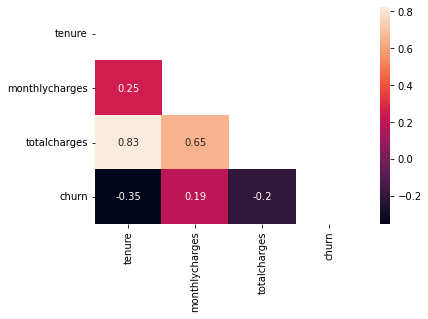

In [70]:
# one hot encoding label
df = telco.copy()
df.churn = telco.churn.replace(('Yes', 'No'), (1, 0))

# korelasi fitur numerik
num_cols = ['tenure',	'monthlycharges', 'totalcharges', 'churn']
mask = np.triu(np.ones_like(df[num_cols].corr()))
sns.heatmap(df[num_cols].corr(), annot=True, mask=mask)

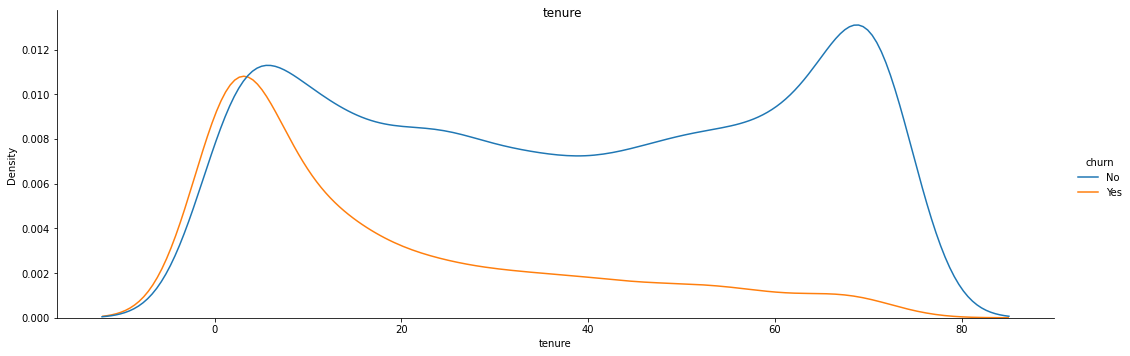

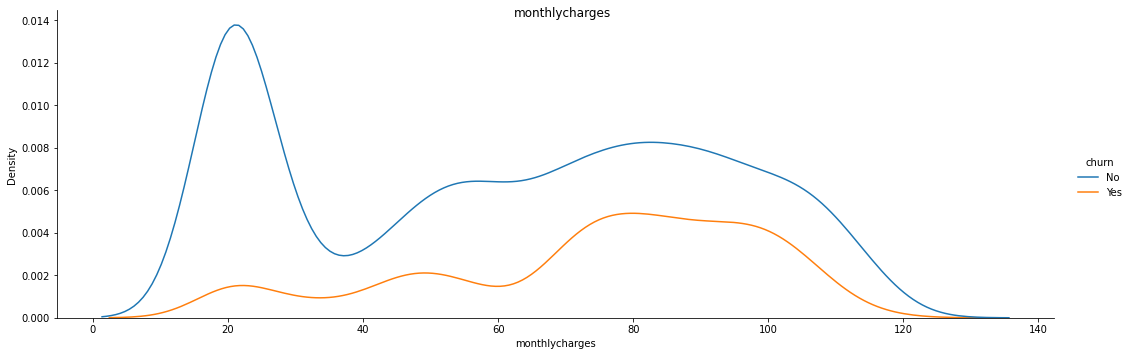

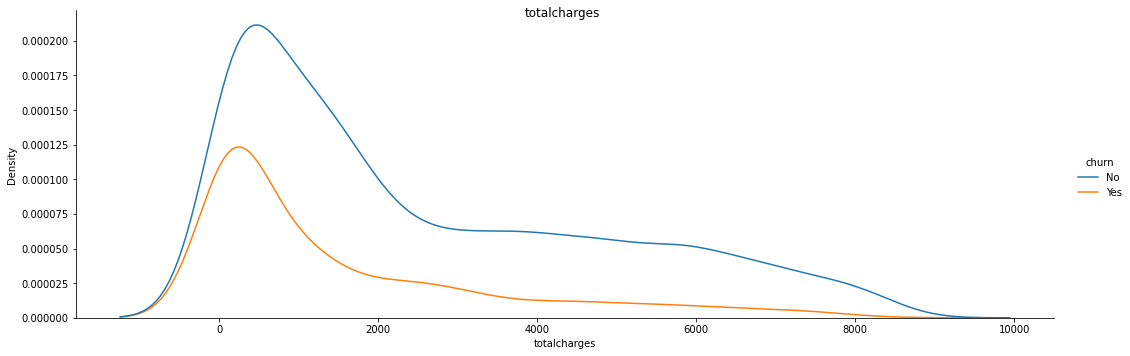

In [71]:
# grafik distribusi
num_cols = ['tenure',	'monthlycharges', 'totalcharges']

for f in num_cols:
    dp2 = sns.displot(telco, x=f, hue="churn", kind="kde", fill=False, height=5, aspect=3)
    dp2.fig.suptitle(f)
plt.show()

- Fitur 'tenure': sebagian besar pelanggan yang hilang adalah pelanggan baru. Hal ini wajar karena pelanggan masih mencoba layanan telco. Nilai korelasi fitur ini terhadap label terbilang rendah, namun lebih tinggi dibanding fitur numerik lain. Bisa dikatakan, telco kurang mampu untuk mempertahankan pelanggan baru.
- Fitur 'monthlycharges': sebagian besar pelanggan yang hilang adalah pelanggan yang memiliki tagihan tinggi. Saya menduga pelanggan ini adalah pelanggan yang mengalami kendala finansial.
- Fitur 'totalcharges': sebagian besar pelanggan yang hilang adalah pelanggan baru. Hal ini sejalan dengan fitur 'tenure'.

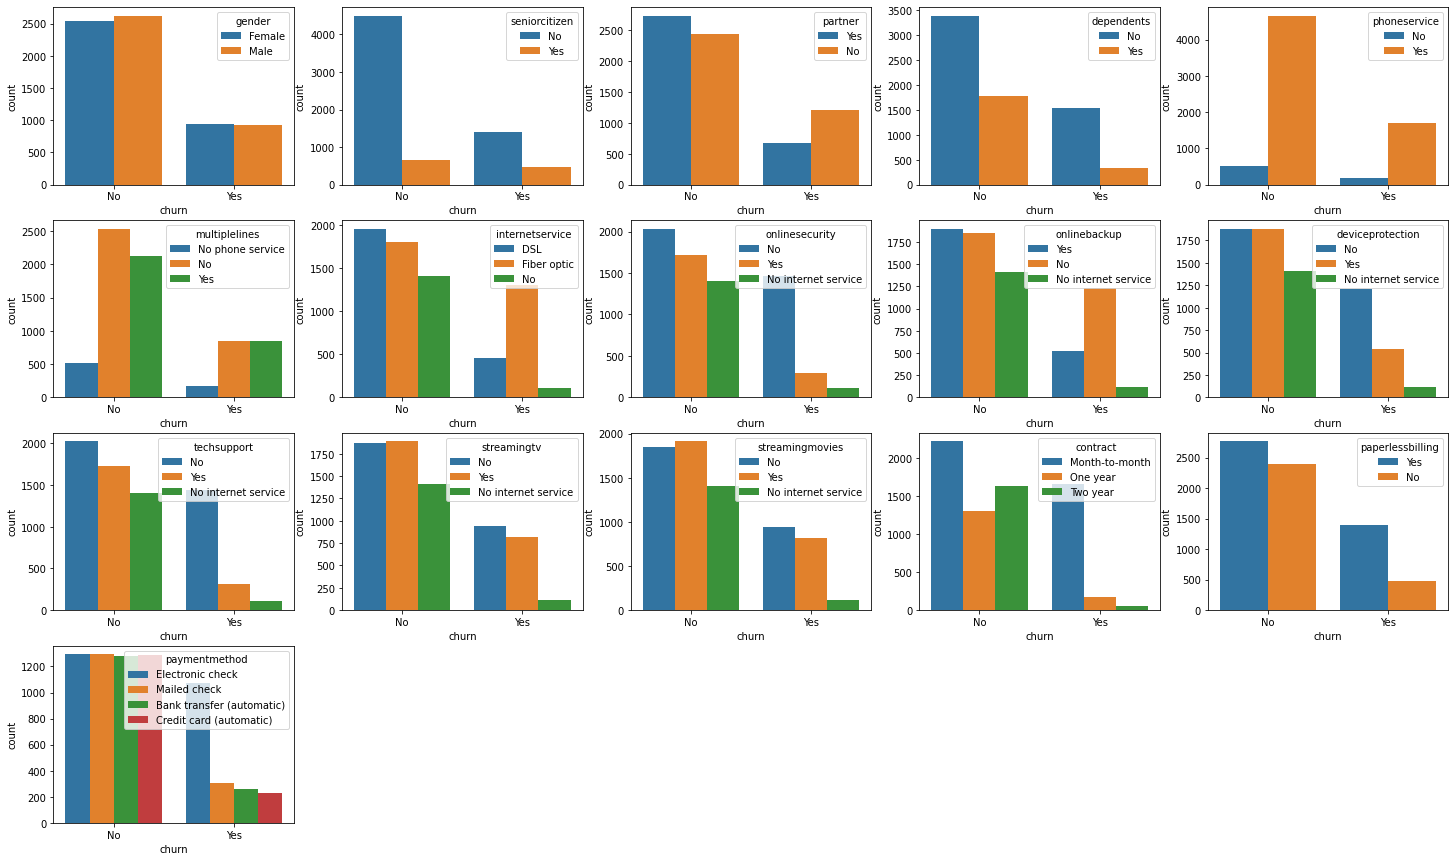

In [72]:
df = telco.drop(['churn'], axis=1)
col_chart = 5
row_chart = int(np.ceil(df.shape[1] / col_chart))

# numeric to categoric
df.seniorcitizen = telco.seniorcitizen.replace((1, 0), ('Yes', 'No'))

plt.figure(figsize=(25, 15))
for ind, col in enumerate(df.select_dtypes(['object'])):
    plt.subplot(row_chart, col_chart, ind+1)
    sns.countplot(x=telco.churn, hue=df[col])
plt.show()

- Berdasarkan demografi pelanggan
  - Jenis kelamin tidak ada pengaruh terhadap jumlah pelanggan yang hilang.
  - Banyak dari pelanggan telco yang hilang adalah pelanggan yang berusia lanjut.
  - Banyak dari pelanggan telco yang hilang adalah pelanggan yang tidak memiliki pasangan.
  - Banyak dari pelanggan telco yang hilang adalah pelanggan yang tidak memiliki tanggungan.

Saya menarik kesimpulan berdasarkan demografi pelanggan, pelanggan yang setia adalah sebagian besar pelanggan berkeluarga yang anaknya belum meninggalkan rumah. Sehingga, beberapa anggota keluarga atau bersama-sama menggunakan layanan telco di rumah.

- Berdasarkan layanan
  - Lebih sedikit dari pelanggan yang memiliki multi saluran (multiplines) yang bertahan atau pelanggan lebih setia pada telco
  - Banyak pelanggan yang hilang adalah pengguna layanan internet fiber optik atau _online backup.
  - Banyak pelanggan yang hilang adalah pengguna yang tidak menggunakan layanan _online security_, _device protection_, atau _tech support_.

Saya menarik kesimpulan berdasarkan layanan, banyak pelanggan yang hilang adalah pelanggan yang memiliki kendala saat menikmati layanan telco, terutama layanan internet fiber optik. Pelanggan tidak menggunakan layanan _online security_, _device protection_, atau _tech support_ ini padahal layanan ini dapat membantu kendala teknis dari telco.

- Berdasarkan informasi akun pelanggan
  - Banyak pelanggan yang hilang adalah pelanggan yang membayar atau mengontrak dari bulan ke bulan. Pelanggan ini memiliki banyak alasan, seperti pelanggan sedang mencoba layanan telco, kemampuan finansial tidak lagi cukup, ada kendala di bulan tersebut, atau sebab lainnya.
  - Banyak pelanggan yang hilang adalah pelanggan yang tidak menggunakan tagihan kertas, atau pelanggan yang membayar dengan cek elektronik. Saya hanya bisa menduga, mungkin ada kendala teknis atau birokrasi yang menyulitkan.

## Data Pre-processing

In [73]:
# label proportion
telco.churn.value_counts() / len(telco) * 100

No     73.421502
Yes    26.578498
Name: churn, dtype: float64

Saya menganggap data label seimbang, walaupun perbedaan proporsi data label sepertiga kali.

In [74]:
X = telco.drop(['churn'], axis=1)
y = telco.churn.replace(('Yes', 'No'), (1, 0))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=3)
print("Row and column test data:", X_test.shape)
print("Row and column train data:", X_train.shape)
print("Row and column validation data:", X_val.shape)


Row and column test data: (1407, 19)
Row and column train data: (4500, 19)
Row and column validation data: (1125, 19)


In [75]:
# list numeric and categoric columns
num_cols = list(X_train.select_dtypes(np.number).columns)
cat_cols = list(X_train.select_dtypes(['object']).columns)

### Data pre-precessing for Sequential API

In [76]:
# one hot encoding
X_train_scaled = pd.DataFrame()
X_val_scaled = pd.DataFrame()
X_test_scaled = pd.DataFrame()

X_train_scaled[num_cols] = X_train[num_cols]
X_val_scaled[num_cols] = X_val[num_cols]
X_test_scaled[num_cols] = X_test[num_cols]

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_scaled[enc.get_feature_names_out()] = enc.fit_transform(X_train[cat_cols])
X_val_scaled[enc.get_feature_names_out()] = enc.transform(X_val[cat_cols])
X_test_scaled[enc.get_feature_names_out()] = enc.transform(X_test[cat_cols])

In [77]:
# normalization
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train_scaled)

In [78]:
strain_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train))
sval_ds = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val))

### Data pre-precessing for Functional API

In [79]:
def df_to_dataset(features, labels, shuffle=True, batch_size=32):
  dataframe = pd.concat([features, labels], axis=1)
  df = dataframe.copy()
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [80]:
#numeric columns
def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

In [81]:
# categorical columns
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  # Create a layer that turns strings into integer indices.
  if dtype == 'string':
    index = StringLookup(max_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
  else:
    index = IntegerLookup(max_tokens=max_tokens)

  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Encode the integer indices.
  encoder = CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply multi-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))

In [82]:
batch_size = 32
train_ds = df_to_dataset(X_train, y_train, batch_size=batch_size)
val_ds = df_to_dataset(X_val, y_val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(X_test, y_test, shuffle=False, batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


In [83]:
all_inputs = []
encoded_features = []

# Numerical features.
for header in num_cols:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

In [84]:
for header in cat_cols:
  categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
  encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=train_ds,
                                               dtype='string',
                                               max_tokens=5)
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)

In [85]:
all_features = tf.keras.layers.concatenate(encoded_features)

## Model Definition

In [86]:
def seq_API():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  return model

In [87]:
def func_API(input, features):
  hidden_1 = Dense(20, activation='relu')(features)
  hidden_2 = Dense(10, activation='relu')(hidden_1)
  output = Dense(1, activation='sigmoid')(hidden_2)

  model = Model(inputs=input, outputs=output)
  return model

## Model Training

### Sequential API

In [88]:
s_model = seq_API()

s_model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

train_batches = strain_ds.shuffle(1000).batch(batch_size)
val_batches = sval_ds.shuffle(1000).batch(batch_size)

s_model_hist = s_model.fit(train_batches, epochs=100, validation_data=val_batches)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


141/141 [==============================] - 2s 5ms/step - loss: 0.6451 - accuracy: 0.6444 - val_loss: 0.4921 - val_accuracy: 0.7724
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4391 - accuracy: 0.7951 - val_loss: 0.4653 - val_accuracy: 0.7867
Epoch 3/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4221 - accuracy: 0.8051 - val_loss: 0.4588 - val_accuracy: 0.7840
Epoch 4/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4152 - accuracy: 0.8071 - val_loss: 0.4543 - val_accuracy: 0.7867
Epoch 5/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4109 - accuracy: 0.8073 - val_loss: 0.4512 - val_accuracy: 0.7867
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4071 - accuracy: 0.8104 - val_loss: 0.4542 - val_accuracy: 0.7884
Epoch 7/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4053 - accuracy: 0.8127 - val_loss: 0.4517 - val_accuracy: 0.7893
Epoch 8/100

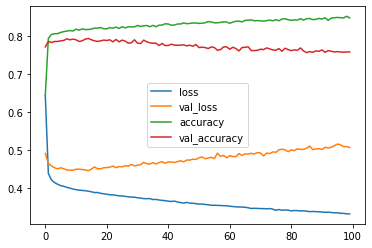

In [89]:
metrics = pd.DataFrame(s_model_hist.history)
metrics[['loss', 'val_loss', 'accuracy', 'val_accuracy']].plot()

### Functional API

In [90]:
# function API
f_model = func_API(all_inputs, all_features)

f_model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  
model_hist = f_model.fit(train_ds, epochs=100, validation_data=val_ds)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['churn'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


141/141 [==============================] - 4s 17ms/step - loss: 0.5195 - accuracy: 0.7291 - val_loss: 0.4672 - val_accuracy: 0.7911
Epoch 2/100
141/141 [==============================] - 2s 12ms/step - loss: 0.4258 - accuracy: 0.7973 - val_loss: 0.4485 - val_accuracy: 0.7956
Epoch 3/100
141/141 [==============================] - 2s 12ms/step - loss: 0.4186 - accuracy: 0.7962 - val_loss: 0.4454 - val_accuracy: 0.8000
Epoch 4/100
141/141 [==============================] - 2s 12ms/step - loss: 0.4172 - accuracy: 0.8024 - val_loss: 0.4415 - val_accuracy: 0.8000
Epoch 5/100
141/141 [==============================] - 2s 12ms/step - loss: 0.4141 - accuracy: 0.8022 - val_loss: 0.4399 - val_accuracy: 0.8018
Epoch 6/100
141/141 [==============================] - 2s 10ms/step - loss: 0.4133 - accuracy: 0.8042 - val_loss: 0.4369 - val_accuracy: 0.7964
Epoch 7/100
141/141 [==============================] - 2s 11ms/step - loss: 0.4115 - accuracy: 0.8040 - val_loss: 0.4393 - val_accuracy: 0.8036
Epoc

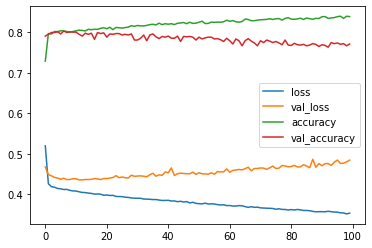

In [91]:
metrics = pd.DataFrame(model_hist.history)
metrics[['loss', 'val_loss', 'accuracy', 'val_accuracy']].plot()

Pada epoch 20, garis loss dan val_loss semakin menjauh, ini menunjukkan bahwa model _overfitting_. Saya akan coba mengevaluasi modelnya.

## Model Evaluation

Saya mencoba belasan kombinasi untuk mencoba mengurangi overfitting pada model. Sejauh ini, model arsitektur di bawah ini yang menghasilkan performa terbaik. Performa terbaik yang saya dapatkan adalah nilai akurasi data train dan validasi tidak semakin menjauh, meskipun masih ada perbedaan pada garis loss train dan loss val.

Di bawah ini saya hanya menampilkan perbedaan penggunaan optimizer

In [92]:
def func_API(input, features):
  hidden_1 = Dense(20, activation='relu', kernel_initializer='he_uniform')(features)
  do_1 = Dropout(0.1)(hidden_1)
  hidden_2 = Dense(10, activation='relu', kernel_initializer='he_uniform')(do_1)
  do_2 = Dropout(0.1)(hidden_2)
  output = Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')(do_2)

  model = Model(inputs=input, outputs=output)
  return model

In [93]:
# function API
f_model = func_API(all_inputs, all_features)

results = {}

for opt in ['adam', 'nadam', 'adamax']:
  f_model.compile(optimizer=opt,
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
  model_hist = f_model.fit(train_ds, epochs=100, validation_data=val_ds)
  results[opt] = pd.DataFrame(model_hist.history)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['churn'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


141/141 [==============================] - 4s 16ms/step - loss: 0.5908 - accuracy: 0.6860 - val_loss: 0.5254 - val_accuracy: 0.7173
Epoch 2/100
141/141 [==============================] - 2s 11ms/step - loss: 0.4751 - accuracy: 0.7544 - val_loss: 0.4748 - val_accuracy: 0.7804
Epoch 3/100
141/141 [==============================] - 2s 12ms/step - loss: 0.4491 - accuracy: 0.7776 - val_loss: 0.4621 - val_accuracy: 0.7822
Epoch 4/100
141/141 [==============================] - 2s 11ms/step - loss: 0.4364 - accuracy: 0.7856 - val_loss: 0.4536 - val_accuracy: 0.7902
Epoch 5/100
141/141 [==============================] - 2s 11ms/step - loss: 0.4323 - accuracy: 0.7904 - val_loss: 0.4487 - val_accuracy: 0.7876
Epoch 6/100
141/141 [==============================] - 2s 11ms/step - loss: 0.4303 - accuracy: 0.7904 - val_loss: 0.4464 - val_accuracy: 0.7893
Epoch 7/100
141/141 [==============================] - 2s 11ms/step - loss: 0.4264 - accuracy: 0.7967 - val_loss: 0.4460 - val_accuracy: 0.7902
Epoc

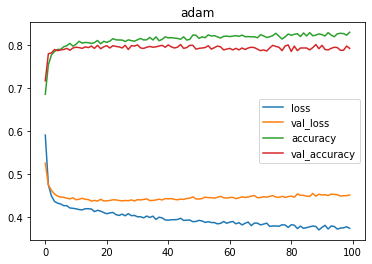

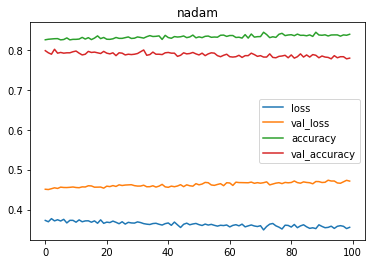

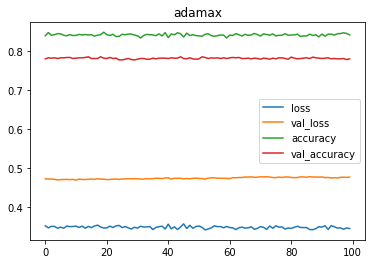

In [99]:
for opt in ['adam', 'nadam', 'adamax']:
  results[opt][['loss', 'val_loss', 'accuracy', 'val_accuracy']].plot()
  plt.title(opt)
  plt.show()

Dilihat dari ketiga grafik tersebut, optimizer cukup mempengaruhi hasil akurasi dan loss, meskipun tidak begitu jauh berbeda. Dari ketiga optimizer, optimizer "adam" menunjukkan hasil yang lebih baik.
Coba kita lihat _classification report_-nya.

In [106]:
yval_pred = f_model.predict(val_ds)
y_pred = []
for element in yval_pred:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [107]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       805
           1       0.64      0.51      0.57       320

    accuracy                           0.78      1125
   macro avg       0.73      0.70      0.71      1125
weighted avg       0.77      0.78      0.77      1125



Hasilnya menunjukkan akurasi mencapai 78 persen.

## Model Saving

In [95]:
# membuat pickle untuk website
with open('telco_modelANN.pkl', 'wb') as model_file:
    pickle.dump(f_model, model_file)

INFO:tensorflow:Assets written to: ram://d1535c2d-ce81-4db3-bc35-3ecab21f0bdd/assets


## Model Inference

In [110]:
ytest_pred = f_model.predict(test_ds)
y_pred = []
for element in ytest_pred:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1051
           1       0.58      0.51      0.54       356

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.78      0.78      0.78      1407



Hasilnya menunjukkan akurasi mencapai 78 persen. Tidak jauh berbeda dengan hasil pada validation.

## Kesimpulan

- Berikut ini beberapa karakterisik pelanggan yang hilang.
  - Pelanggan yang belum berkeluarga atau pelanggan lanjut usia.
  - Pelanggan yang memiliki kendala saat menikmati layanan telco, terutama layanan internet fiber optik. Pelanggan tidak menggunakan layanan _online security_, _device protection_, atau _tech support_ padahal layanan ini dapat membantu kendala teknis dari telco.
  - Pelanggan yang membayar atau mengontrak dari bulan ke bulan. Pelanggan ini memiliki banyak alasan, seperti pelanggan baru yang sedang mencoba layanan telco, kemampuan finansial tidak lagi cukup, ada kendala di bulan tersebut, atau sebab lainnya.
  - Banyak pelanggan yang hilang adalah pelanggan yang tidak menggunakan tagihan kertas, atau pelanggan yang membayar dengan cek elektronik. Saya hanya bisa menduga, mungkin ada kendala teknis atau birokrasi yang menyulitkan.
- Saran untuk perusahaan Telco:
  - Sebagian besar fitur mengindikasikan bahwa pelanggan yang hilang adalah pelanggan baru, maka sebaiknya fokus promosi Telco kepada pelanggan baru untuk meningkatkan retensi pelanggan baru. Salah satu contohnya seperti memberi diskon atau bonus jika melakukan pembelian untuk bulan berikutnya.
- Model dengan perubahan arsitektur seperti penambahan dropout, penetapan kernel_initializer, dan optimizer dapat mempengaruhi nilai akurasi antara data train dan validasi. Meskipun, nilai loss tidak jauh berbeda.
